# EDA (Exploratory Data Analysis): 

This is a basic exploratory data analysis for categorical and numerical variables specially focused on relationship beeteen variables.  It has been tested this dataset:
- **weather**: my dataset with numerical and categorical data without target.

In [1]:
%matplotlib inline
import os
import sys  
import numpy as np
import pandas as pd
from datetime import datetime
import copy
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

# import reader
sys.path.append('../../scripts')  
from tools.reader import csv2df as reader
from tools.reader import get_dcol

### arguments

In [2]:
starget = ''
ddt ={'lcol':['datetime'],'sformat':"%Y-%m-%d %H:%M:%S"}

## DATA

### import scikit-learn datasets 

### read data: titanic dataset

### read weather (timeseries) dataset

In [3]:
## read data
path = os.path.join('../../datasets','dataset.weather.csv')
dfdata,dcol = reader(path,ddt=ddt)
dfdata = dfdata.set_index('datetime')
## collect temporal components
dfdata['year'] = [i.year for i in dfdata.index.tolist()]
dfdata['month'] = [i.month for i in dfdata.index.tolist()]
dfdata['day'] = [i.day for i in dfdata.index.tolist()]
dfdata['hour'] = [i.hour for i in dfdata.index.tolist()]
dfdata['dow'] = [int(i.strftime("%w")) for i in dfdata.index.tolist()]
dfdata['doy'] = [int(i.strftime("%j")) for i in dfdata.index.tolist()]
dcol['lc_cat'] = dcol['lc_cat'] + ['year','month','day','hour','dow','doy']

### data preparation

In [4]:
## num int to categorical

# get dcol
dcol = get_dcol(dfdata,ltarget=['y','logy','cy'])
# conversion
for scol in dcol['lc_int']:
    dfdata[scol] = dfdata[scol].astype('category')
# get dcol again
dcol = get_dcol(dfdata,ltarget=['y','logy','cy'])

In [5]:
# available variables
print('Column names:')
print('- variables(%s): %s'%(len(dcol['lx']),dcol['lx']))
print('- float(%s): %s'%(len(dcol['lc_float']),dcol['lc_float']))
print('- int(%s): %s'%(len(dcol['lc_int']),dcol['lc_int']))
print('- cat(%s): %s'%(len(dcol['lc_cat']),dcol['lc_cat']))

Column names:
- variables(19): ['RH (%)', 'WD', 'WS (m/s)', 'cloud_coverage', 'dew_point (degC)', 'irradiation (MJ/m2)', 'local_press (hPa)', 'precipitation (mm)', 'sea-level pressure (hPa)', 'sunlight_duration (h)', 'temperature (degC)', 'vapor_press (hPa)', 'visibility (km)', 'year', 'month', 'day', 'hour', 'dow', 'doy']
- float(11): ['RH (%)', 'WS (m/s)', 'dew_point (degC)', 'irradiation (MJ/m2)', 'local_press (hPa)', 'precipitation (mm)', 'sea-level pressure (hPa)', 'sunlight_duration (h)', 'temperature (degC)', 'vapor_press (hPa)', 'visibility (km)']
- int(0): []
- cat(8): ['WD', 'cloud_coverage', 'year', 'month', 'day', 'hour', 'dow', 'doy']


## NUMERICAL DATA

### HEAT MAP 

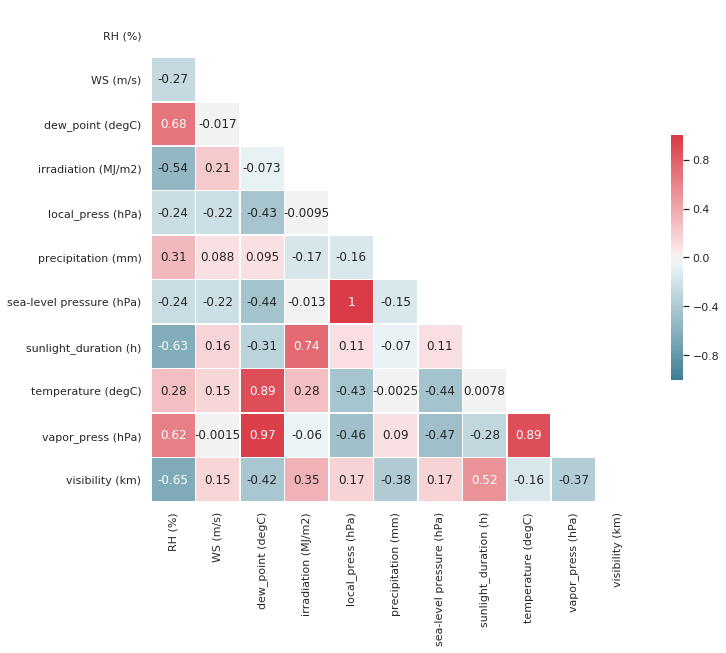

In [6]:
display(HTML('<h1>HEAT MAP:</h1>'))
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

# Compute the correlation matrix
corr = dfdata[dcol['lc_float']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1., vmax=1., center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### HEAT MAP (custom)

In [7]:
lnum_sel =  ['RH (%)', 'WS (m/s)', 'dew_point (degC)']
limit_corrmin = -0.5
limit_corrmax = 0.5

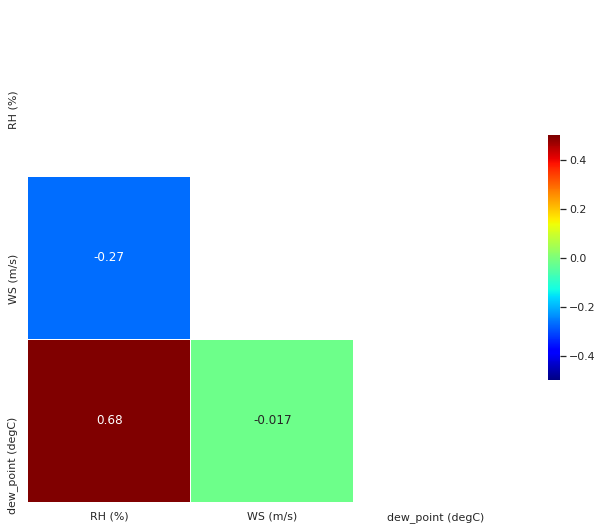

In [8]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

# Compute the correlation matrix
corr = dfdata[lnum_sel].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = 'jet'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=limit_corrmin, vmax=limit_corrmax, center=0, annot=True, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### without selection

In [20]:
display(HTML('<h1>NUMERICAL:</h1>'))
if len(dcol['lc_float'])<=12:
    display(HTML('<h2>without selection:</h2>'))
    try:
        import seaborn as sns
        sns.set(style="ticks")
        sns.pairplot(dfdata[dcol['lc_float'].dropna()])
    except:
        pass
else:
    print('[warning] too much variables.')

### with selection

In [15]:
# selection
lcol_sel = ['RH (%)', 'WS (m/s)', 'dew_point (degC)']

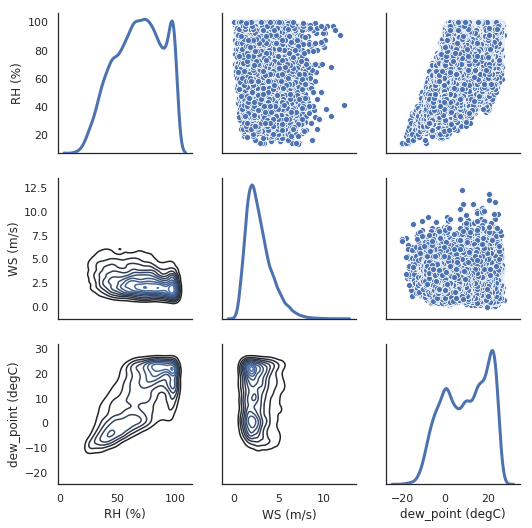

In [16]:
if len(dcol['lc_float'])<=12:
    display(HTML('<h2>with selection:</h2>'))
    #import seaborn as sns
    #sns.set(style="ticks")
    #sns.pairplot(dfdata[lcol_sel])
    import seaborn as sns
    sns.set(style="white")
    g = sns.PairGrid(dfdata[lcol_sel].dropna(), diag_sharey=False)
    g.map_lower(sns.kdeplot)
    g.map_upper(sns.scatterplot)
    g.map_diag(sns.kdeplot, lw=3)    
else:
    print('[warning] too much variables.')

### with pairs selection 

In [17]:
# pairs selection
lpairs_sel = [['RH (%)','WS (m/s)'],['dew_point (degC)','WS (m/s)']]

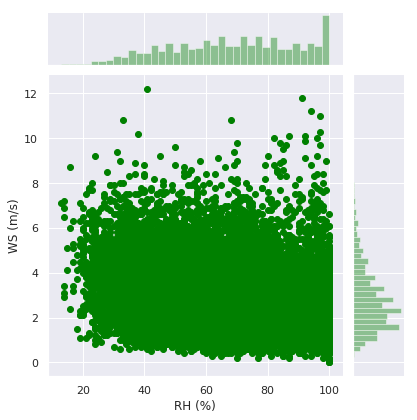

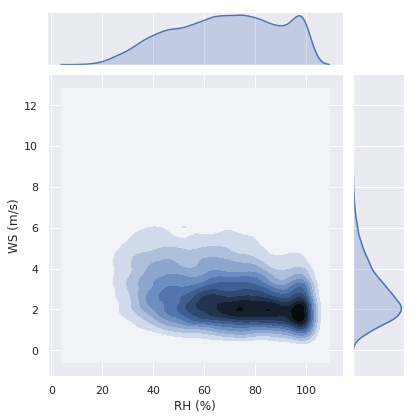

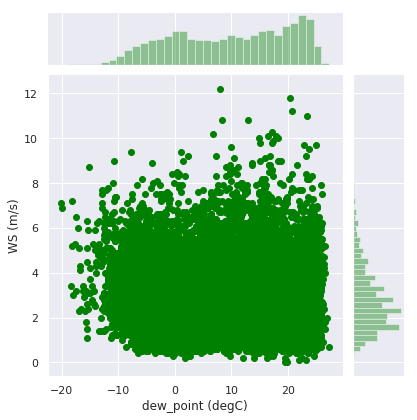

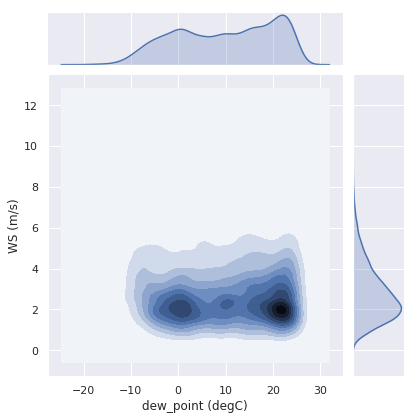

In [18]:
# loop of pairs
for ipair in lpairs_sel:
    display(HTML('<h2>pairs: %s - %s</h2>'%(ipair[0],ipair[1])))
    # validation
    if ipair[0] in list(dfdata.columns) and ipair[1] in list(dfdata.columns):
        # plot scatter
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(style="darkgrid")        
        g = sns.jointplot(ipair[0], ipair[1], data=dfdata[ipair], kind="scatter",
                          color="green", height=6)
        plt.show()
        # plot kde
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(style="darkgrid")        
        g = sns.jointplot(ipair[0], ipair[1], data=dfdata[ipair], kind="kde",
                          color="b", height=6)
        plt.show()
        
    else:
        print('[error] "%s" or "%s" not in dataframe.'%(ipair[0],ipair[1]))
        

## CATEGORICAL DATA

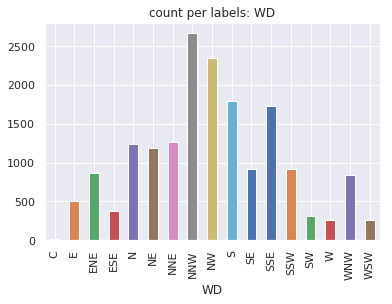

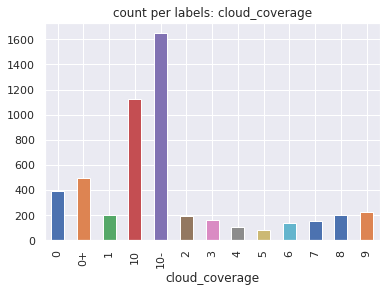

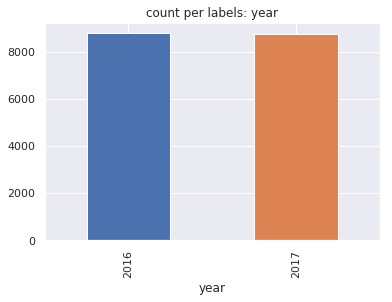

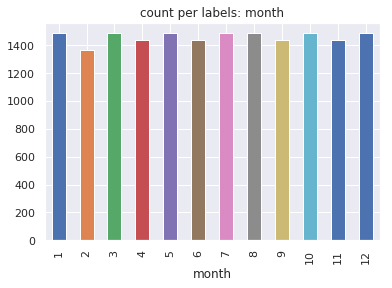

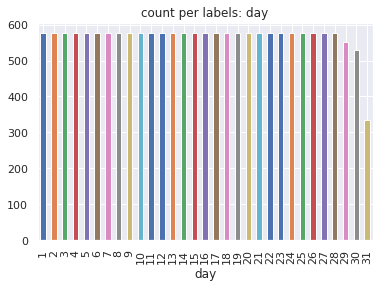

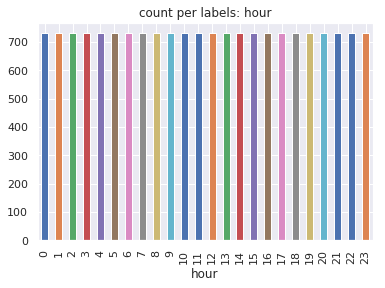

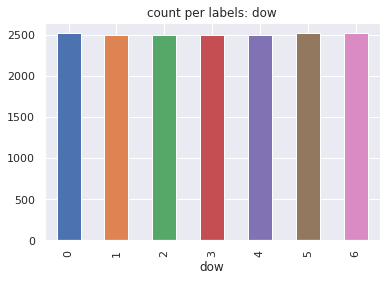

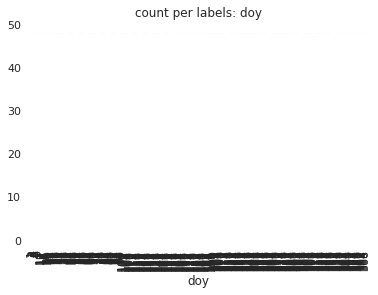

In [19]:
display(HTML('<h1>CATEGORICAL:</h1>'))
for icol in dcol['lc_cat']:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    dfdata.groupby(icol)[icol].count().plot(kind='bar',title='count per labels: %s'%icol,ax=ax)
    plt.show()

## NUMERACIAL vs CATEGORICAL DATA

### with selection

In [21]:
# selection
lnum_sel = ['RH (%)','dew_point (degC)']
lcat_sel = ['hour']

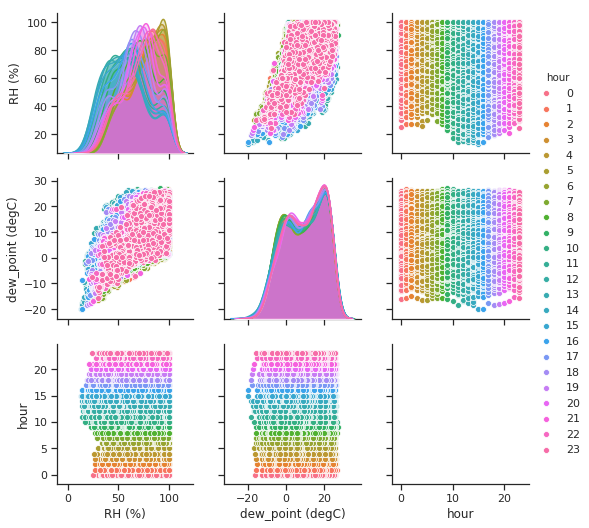

In [22]:
display(HTML('<h1>CATEGORICAL VS NUMERICAL:</h1>'))
# loops
for icat in lcat_sel[:1]:
    display(HTML('<h2>Categorical: %s vs Numerical: [%s]</h2>'%(icat,','.join(lnum_sel))))
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(style="ticks")
    sns.pairplot(dfdata[lnum_sel+[icat]], hue=icat)    
    plt.show()
        

### with pairs (num vs num) vs cat

In [23]:
# selection: pair = ( [num1, num2], cat )
lpairs = [ [['RH (%)','dew_point (degC)'],'hour'] ]

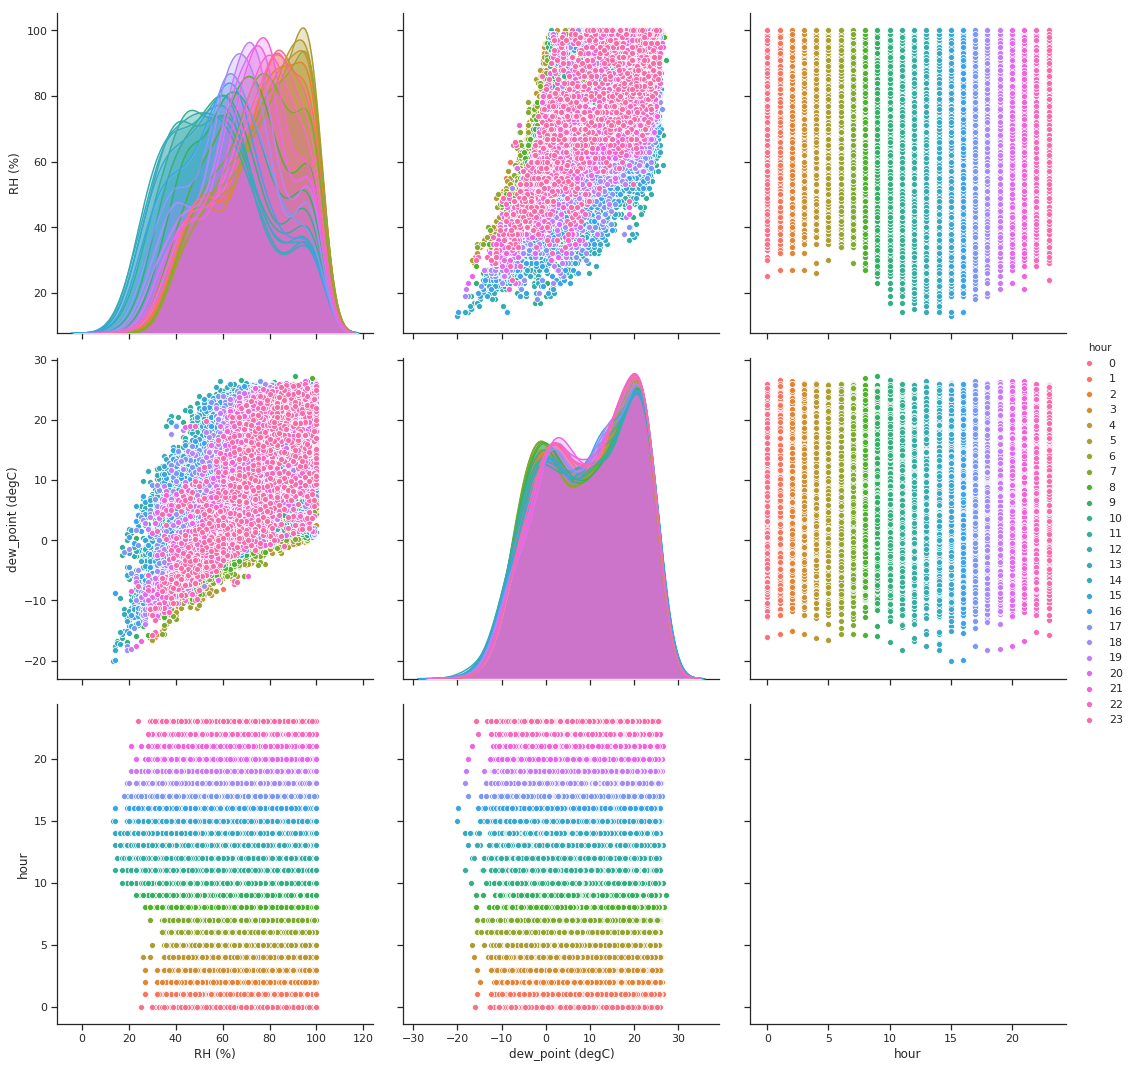

In [24]:
display(HTML('<h1>CATEGORICAL VS NUMERICAL: pairs</h1>'))
# loops
for ipair in lpairs:
    lnum, icat = ipair
    display(HTML('<h2>Categorical: %s vs Numerical: %s</h2>'%(icat,lnum)))
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(style="ticks")
    sns.pairplot(dfdata[lnum+[icat]], hue=icat,height = 5)    
    plt.show()